# Sleep Health and Lifestyle PROJECT

We will use a dataSet from Laksika Tharmalingam, especial thank you!

It can be found in url="https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data"

## What is Sleep?
Sleep is a period of rest. 
Sleep is a state of reduced mental and physical activity in which consciousness is altered and sensory activity is inhibited to a certain extent. During sleep, there is a decrease in muscle activity, and interactions with the surrounding environment. While sleep differs from wakefulness in terms of the ability to react to stimuli, it still involves active brain patterns, making it more reactive than a coma or disorders of consciousness.

## Why is it important?

Sleep isn’t just a time when your brain and body shut down. Getting enough sleep helps you think more clearly and react more quickly. Not getting enough sleep can be dangerous, not only affecting your performance, but your health and mood, too.

## Purpose of Project

In this analysis we want to determine if:
* There are a relation in between gender or age with the amount of hours of sleep?;
* There are a relation in between profession with the type of Sleep Disorders?
* If sleep quality can be use as a health marker;
* And if so, can we predict health by sleep quality?

## Data Overview

Person ID: An identifier for each individual.
Gender: The gender of the person (Male/Female).
Age: The age of the person in years.
Occupation: The occupation or profession of the person.
Sleep Duration (hours): The number of hours the person sleeps per day.
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
Heart Rate (bpm): The resting heart rate of the person in beats per minute.
Daily Steps: The number of steps the person takes per day.
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Details about Sleep Disorder Column:

* None: The individual does not exhibit any specific sleep disorder.
* Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
* Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.



## 1. Data Processing

In [1]:
%pip install seaborn

In [2]:
#import all packages we will use
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import figure, show, legend, ylabel 
import seaborn as sns

In [3]:
#defining the dataset
sleepData = "sleepData.csv"

In [4]:
#import the dataset
sleepData = pd.read_csv(sleepData)

In [5]:
#Then we can procced to see our dataset

#Head, we can see the first rows
sleepData.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
#Tail, we can see the last rows
sleepData.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
#With shape we can see number of rows and number of columns
sleepData.shape

(374, 13)

In [8]:
#Then we find the name of the columns 
sleepData.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [9]:
#And so more information about the information in the columns
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.8+ KB


In [10]:
#How unique is the data set?
sleepData.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [11]:
# Check numerical data types
#but first we exclude person ID
sleepData.drop('Person ID', axis = 1, inplace = True)

numerical_columns = sleepData.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = sleepData[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = sleepData.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = sleepData[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '11

## 2. Exploratory Data Analysis

In [32]:
# Style for our future graphs
color = sns.color_palette("tab10", 3)
grad = sns.color_palette("rocket", as_cmap=True)

### 2.1. Which Sleep pattern is more common?

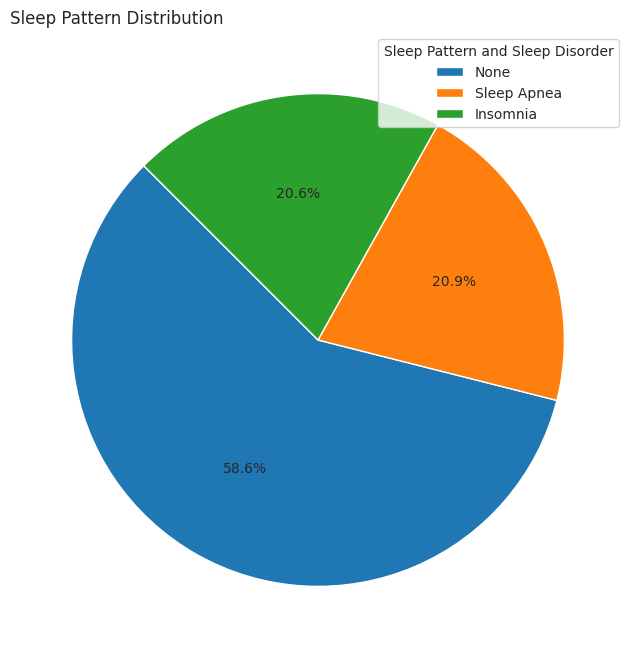

In [33]:
#We will make a pie graph using only our type of Sleep Disorder column so we can anilyse incedence

sleep_count = sleepData['Sleep Disorder'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sleep_count, autopct='%1.1f%%', startangle=135)
plt.title("Sleep Pattern Distribution", loc='left')
plt.legend(labels=sleep_count.index, title="Sleep Pattern and Sleep Disorder", loc="upper right")
plt.show()

* We can see that Non- sleep Disorder or "None" is the more common sleep Pattern

### 2.2 Which gender has more sleep disorders?

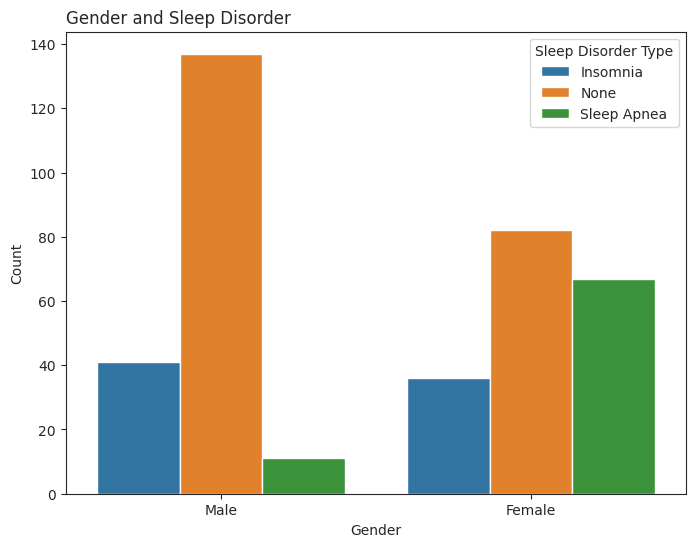

In [34]:
# Now we divide our sleep Disorder data in two genders (Female and Male)
# The data only gives two options for gender

sleep_gender = sleepData.groupby('Sleep Disorder')['Gender'].value_counts()
sleep_gender = sleep_gender.reset_index(name='count')  


plt.figure(figsize=(8, 6))
sns.barplot(x='Gender',
            y='count',
            hue='Sleep Disorder',
            data=sleep_gender,
            palette=color)
sns.set_style('ticks')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Sleep Disorder', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

* It appears that more Male have None sleep disorder.* 
Insomnia occurs equally in both males and females

*  
Female is happen to be have more Sleep Apnea than Male.

## 2.2.2 Gender and Age relation on the Data Base

<ipython-input-36-4e8074788cf0>:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Age',


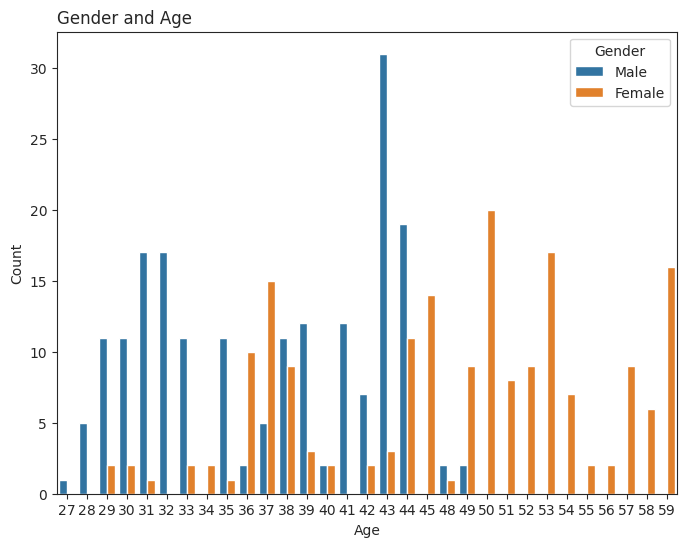

In [36]:
# We need to make a relation between Age and Gender to realize if influences in our Sleep Disorders data.

age_gender = sleepData.groupby('Age')['Gender'].value_counts()
age_gender = age_gender.reset_index(name='count')  


plt.figure(figsize=(8, 6))
sns.barplot(x='Age',
            y='count',
            hue='Gender',
            data=age_gender,
            palette=color)
sns.set_style('ticks')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender and Age', loc='left')


plt.show()

*  We can realize that we have more woman over 45years then Males in the data base
*  And in the other hand we have more young Males than Females

### 2.3. Age Distribution on Sleep Disorder

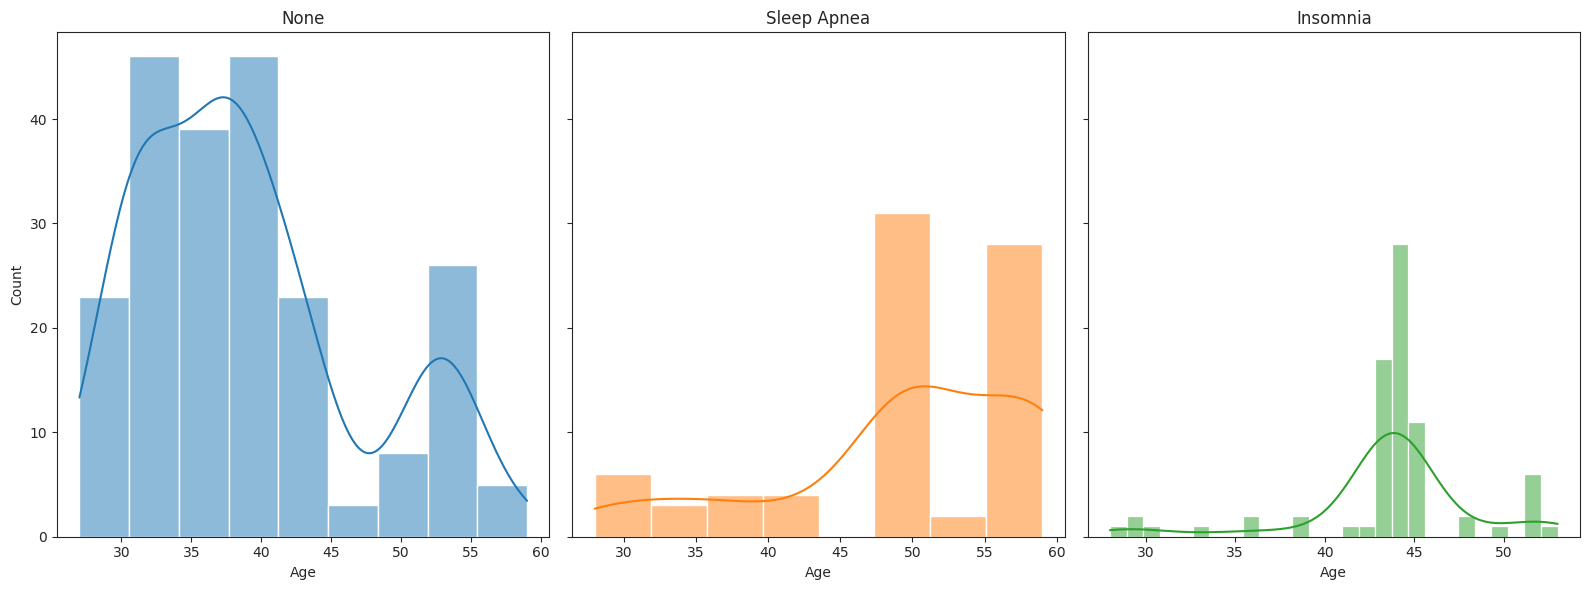

In [39]:
# Now we do tree graphs one for each Sleep Disorders in relation Age groups

sleep_list = ['None', 'Sleep Apnea', 'Insomnia']

fig, axes = plt.subplots(1, len(sleep_list), figsize=(16, 6), sharey=True)

# Set labels and title and legend
for i, _ in enumerate(sleep_list):
    ax = axes[i]
    colors = color[i % len(color)]
    sns.histplot(data = sleepData[sleepData['Sleep Disorder'] == _], 
                 x = 'Age', 
                 kde = True, 
                 color = colors, 
                 ax = ax)
    ax.set_title(_)
    
# Show the plot
plt.tight_layout()
plt.show()

* In the age range of 30 to 42, the are most os people with None sleep disorder.
* 
Sleep Apnea is more prevalent in the age range of 50 to 57
* 
The age range of 43 to 45 sees a higher occurrence of the Insomnia.

## 2.4 Age and gender relation on sleep 

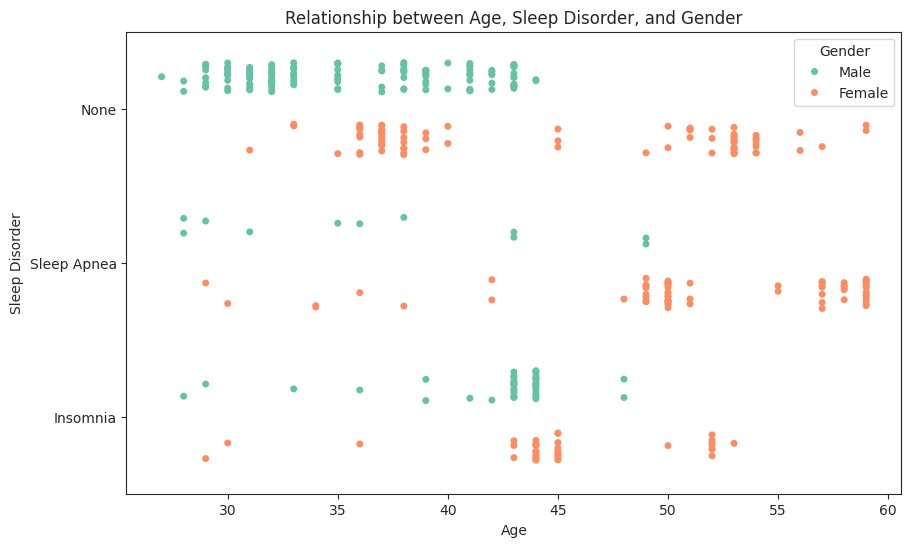

In [38]:
# Now we can do a dot graph using three vaiables ("Age", "Sleep Disorder", "Gender")
sleep_list = ['None', 'Sleep Apnea', 'Insomnia']

plt.figure(figsize=(10, 6))
sns.stripplot(data=sleepData, x="Age", y="Sleep Disorder", hue="Gender", jitter=0.2, dodge=True, palette="Set2", marker='o')

# Add legend
plt.legend(title='Gender')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.title('Relationship between Age, Sleep Disorder, and Gender')

# Show the plot
plt.show()

### 2.5 What's is Sleep Quality in the Sleep Disorder?

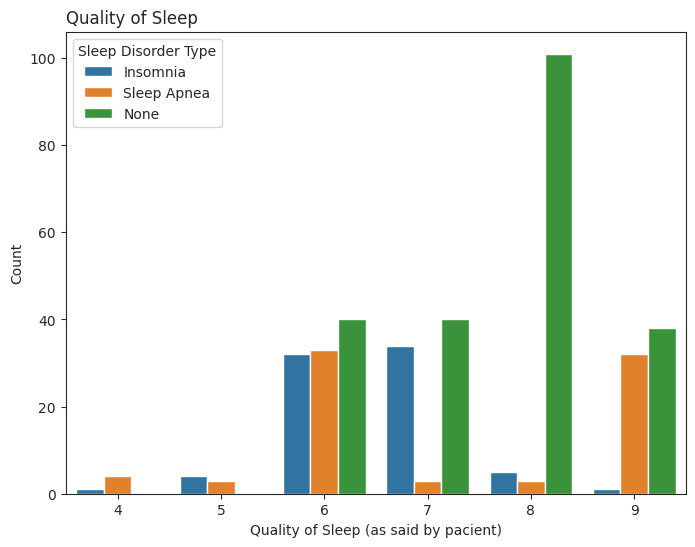

In [40]:
# Now we make a Quality of Sleep Graph
sleep_quality = sleepData.groupby('Sleep Disorder')['Quality of Sleep'].value_counts()
sleep_quality = sleep_quality.reset_index(name="count")

# Making graph
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Quality of Sleep',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_quality,
            palette = color)

# Add Label, title and Legend
plt.xlabel('Quality of Sleep (as said by pacient)')
plt.ylabel('Count')
plt.title('Quality of Sleep', loc='left')
plt.legend(title='Sleep Disorder Type', loc='upper left')

#Show plot 
plt.show()

* First we need to note that Quality of Sleep is a "opinion" of the person
* With level quality of sleep in 8, data shows that None sleep disorder.
* With level quality of sleep 6 to 7, data shows that chance of Insomnia sleep disorder and 6 and 9 shows that chance of Sleep Apnea.

### 2.6 Does Physical Activity Leve influences in Sleep Pattern?

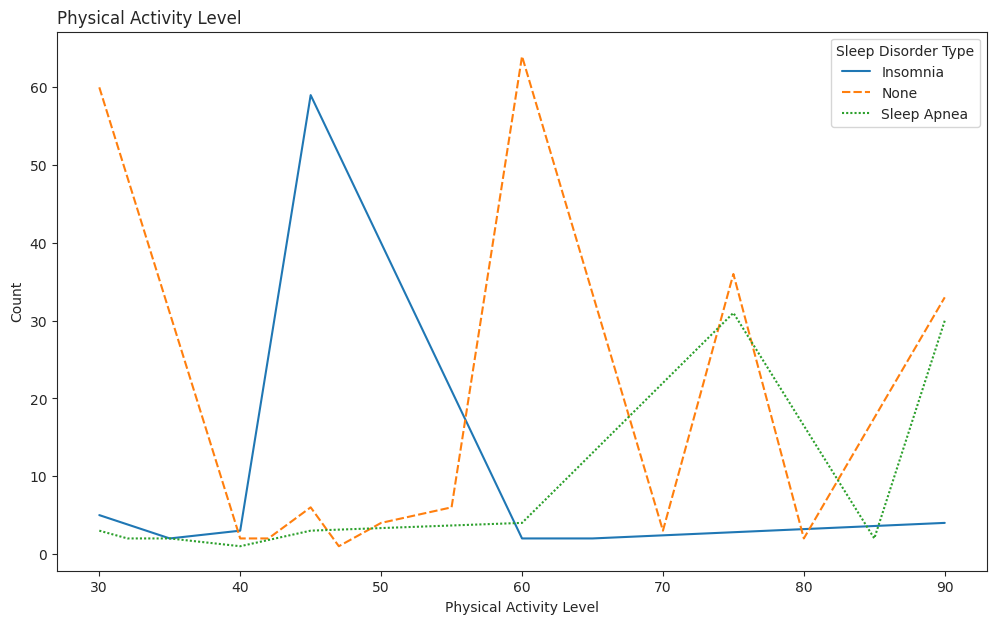

In [41]:
# Now we make a plot between Physical activity and Sleep Pattern/Disorders
sleep_physical = sleepData.groupby('Sleep Disorder')['Physical Activity Level'].value_counts()
sleep_physical = sleep_physical.reset_index(name= "count")

# Making graph
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Physical Activity Level',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_physical,
             palette = color,
             style = 'Sleep Disorder')

# Add Label, title and Legend
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.title('Physical Activity Level', loc='left')
plt.legend(title='Sleep Disorder Type')

#Show plot 
plt.show()

* Insomnia: Mostly happen at Physical Activity Level 45.
* 
None: Highest at Physical Activity Level 60
* 
Sleep Apnea: Shows at at Physical Activity Levels 75 and 90.

### 2.7 Sleep Duration and Sleep Disorder

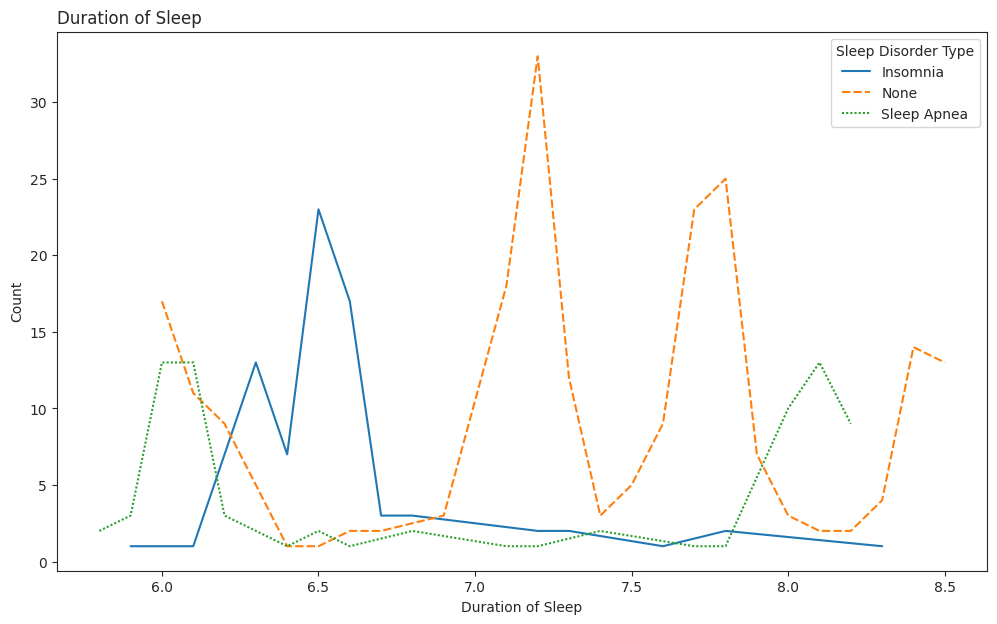

In [42]:
# Now we make a plot between Sleep Duration and Sleep Disorder
sleep_duration = sleepData.groupby('Sleep Disorder')['Sleep Duration'].value_counts()
sleep_duration = sleep_duration.reset_index(name="count")

# Making graph
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Sleep Duration',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_duration,
             palette = color,
             style = 'Sleep Disorder')

# Add Label, title and Legend
plt.xlabel('Duration of Sleep')
plt.ylabel('Count')
plt.title('Duration of Sleep', loc='left')
plt.legend(title='Sleep Disorder Type')

#Show plot 
plt.show()

* Insomnia: Most common sleep duration is around 6.4 to 6.6 hours.
* 
None: Most higher chance sleep duration is around 7.2, 7.7, and 7.8 hours
* 
Sleep Apnea: Sleep durations around 6.0 to 6.2 hours.

### 2.8 Relations between occupation and sleep

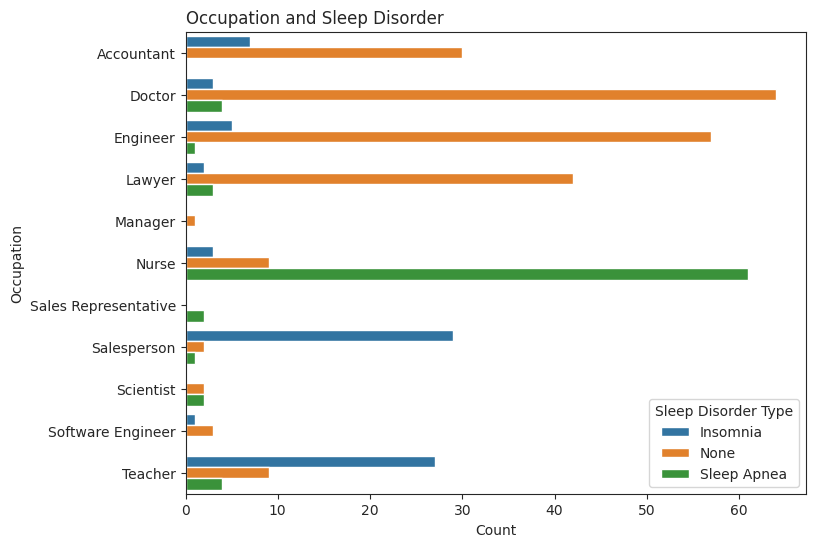

In [43]:
# Now we make a plot between Sleep Duration and Sleep Disorder
sleep_occupation = sleepData.groupby('Sleep Disorder')['Occupation'].value_counts()
sleep_occupation = sleep_occupation.reset_index(name='count') 
sleep_occupation = sleep_occupation.sort_values(by='Occupation', ascending=True)

# Making graph
plt.figure(figsize=(8, 6))
sns.barplot(x='count',
            y='Occupation',
            hue='Sleep Disorder',
            data=sleep_occupation,
            palette=color)
sns.set_style('ticks')

# Add Label, title and Legend
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Occupation and Sleep Disorder', loc='left')
plt.legend(title='Sleep Disorder Type')

#show plot 
plt.show()

* The top Insomnia professions are Salesperson, followed by Teacher, and Accountant.* Nurses are having Sleep Apnea the most than other occupations
* 
Doctor, Engineer, Lawyerare  haing the best  sleepin our listr.

### 2.9 Does Stress Level influences Sleep? 

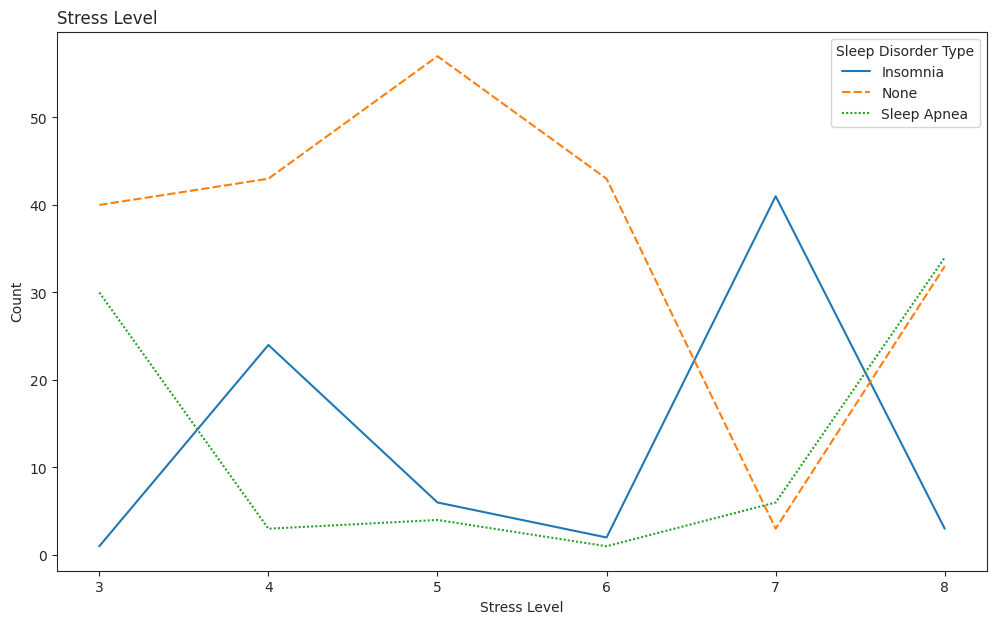

In [44]:
# Now we make a plot between Stress and Sleep
sleep_stress = sleepData.groupby('Sleep Disorder')['Stress Level'].value_counts()
sleep_stress = sleep_stress.reset_index(name="count")

# Making graph
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'Stress Level',
             y = 'count',
             hue = 'Sleep Disorder',
             data = sleep_stress,
             palette = color,
             style = 'Sleep Disorder')

# Add Label, title and Legend
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Stress Level', loc='left')
plt.legend(title='Sleep Disorder Type')

# Show plot
plt.show()

* Insomnia: Most common stress level is around 4 and 7.
* None: Most higher chance sleep duration is around 4 to 6.
* Sleep Apnea: Sleep durations around 3 and 8.

### 2.10 BMI and Sleep Disoders

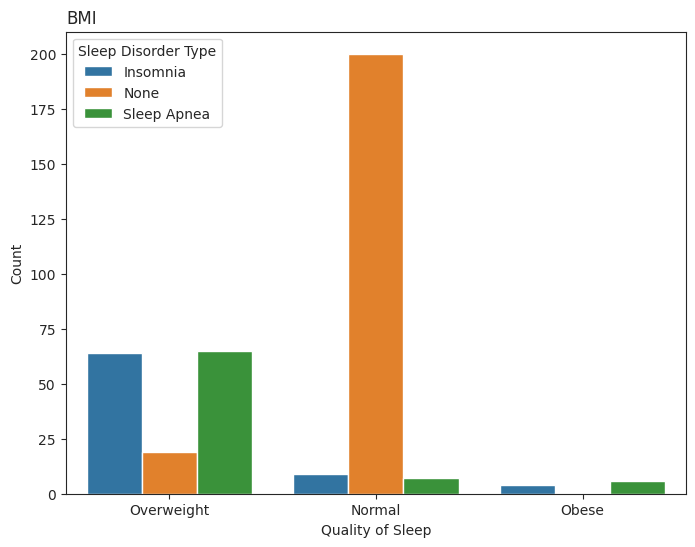

In [45]:
# Now we make a plot between BMI AND Sleep Disorder
sleep_bmi = sleepData.groupby('Sleep Disorder')['BMI Category'].value_counts()
sleep_bmi = sleep_bmi.reset_index(name="count")

# Making a graph
plt.figure(figsize=(8, 6))
sns.barplot(x = 'BMI Category',
            y = 'count',
            hue = 'Sleep Disorder',
            data = sleep_bmi,
            palette = color)

# Add Label, title and Legend
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('BMI', loc='left')
plt.legend(title='Sleep Disorder Type', loc='upper left')

#show plot
plt.show()

* Normal BMI: Mostly no sleep disorder.
* 
Overweight: More likely to have Insomnia or Sleep Apnea.

### 2.11 Blood Pressure and Sleep Disorder

In [31]:
# Before we can make our graph we need converting non-numeric data (String or Boolean) into numbers

from sklearn.preprocessing import LabelEncoder

col_corr = ['Age', 'Gender', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 
            'Daily Steps', 'Sleep Disorder']

# Check if all columns in col_corr exist in the DataFrame
missing_columns = set(col_corr) - set(sleepData.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Create a copy of the DataFrame for correlation analysis
    sleepData_cor = sleepData.copy()

    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Apply label encoding to each selected column
    for x in col_corr:
        sleepData_cor[x] = le.fit_transform(sleepData_cor[x])

    # Create a correlation matrix for the numeric columns
    correlation_matrix = sleepData_cor[col_corr].corr()

    # Print or further analyze the correlation matrix
    print(correlation_matrix)

                              Age    Gender  Occupation  Sleep Duration  \
Age                      1.000000 -0.582396    0.256096        0.356898   
Gender                  -0.582396  1.000000   -0.219113       -0.129468   
Occupation               0.256096 -0.219113    1.000000       -0.312653   
Sleep Duration           0.356898 -0.129468   -0.312653        1.000000   
Quality of Sleep         0.477546 -0.291366   -0.278071        0.879352   
Physical Activity Level  0.155844  0.002004   -0.079936        0.192503   
Stress Level            -0.435368  0.396018    0.021123       -0.810712   
BMI Category             0.533818 -0.339945    0.694390       -0.362087   
Heart Rate              -0.243457  0.200785    0.051072       -0.488306   
Daily Steps             -0.003409  0.073201   -0.126290        0.072468   
Sleep Disorder           0.200495 -0.253415   -0.169800        0.171440   

                         Quality of Sleep  Physical Activity Level  \
Age                          

### Blood Pressure Plot

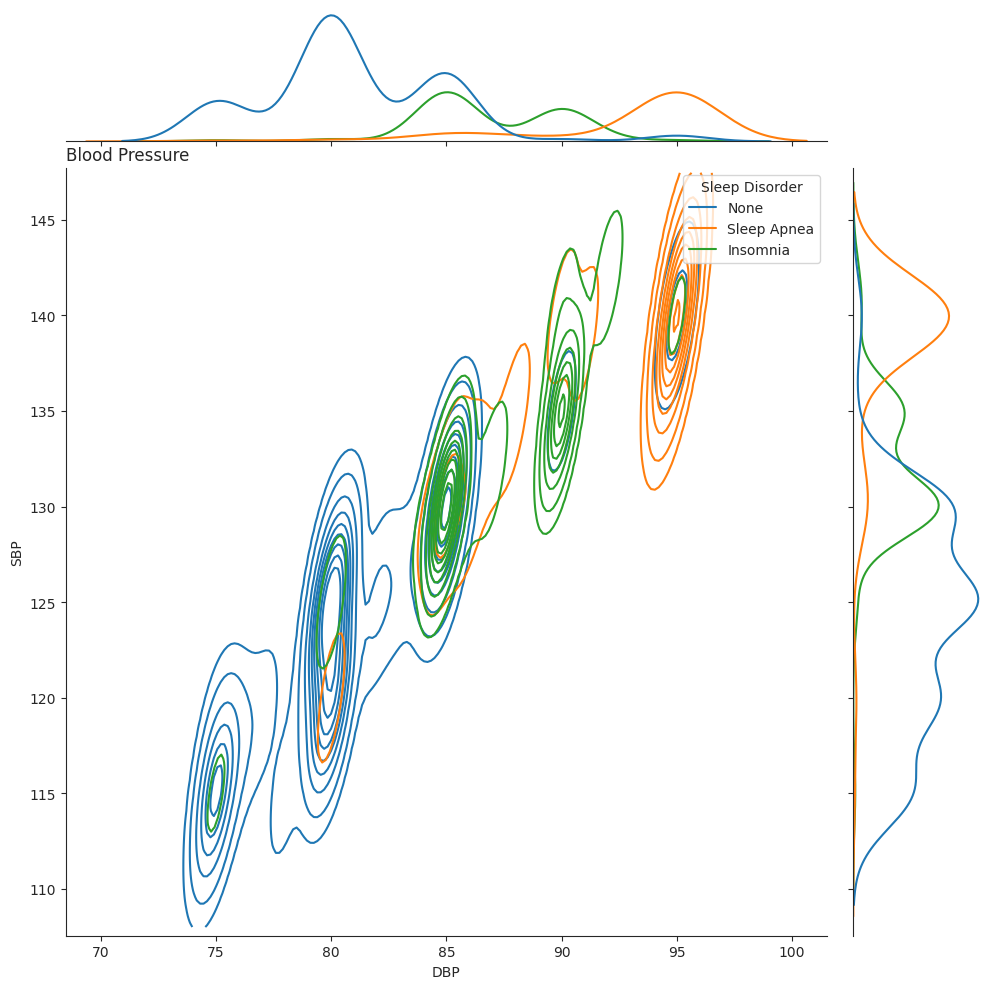

In [46]:
# Now we make a plot using BP Data
sleepData[['SBP', 'DBP']] = sleepData['Blood Pressure'].str.split('/', expand=True)
sleepData[['SBP', 'DBP']] = sleepData[['SBP','DBP']].astype(int)

# Making graph and adding Label, title and Legend
sns.jointplot(data = sleepData,
              x = 'DBP', 
              y = 'SBP', 
              hue ='Sleep Disorder',
              kind = 'kde',
              palette = color,
              height = 10,
              )
plt.title('Blood Pressure', loc='left')

#Show plot 
plt.show()

* None sleep disorder likely at 120/80 to 125/85 blood pressure.
* 
Insomnia sleep disorder likely at 130/85 to 135/90 blood pressure
* 
Sleep Apnea sleep disorder likely at 140/95 blood pressure.

### 2.12  Quality of Sleep vs Blood Pressure

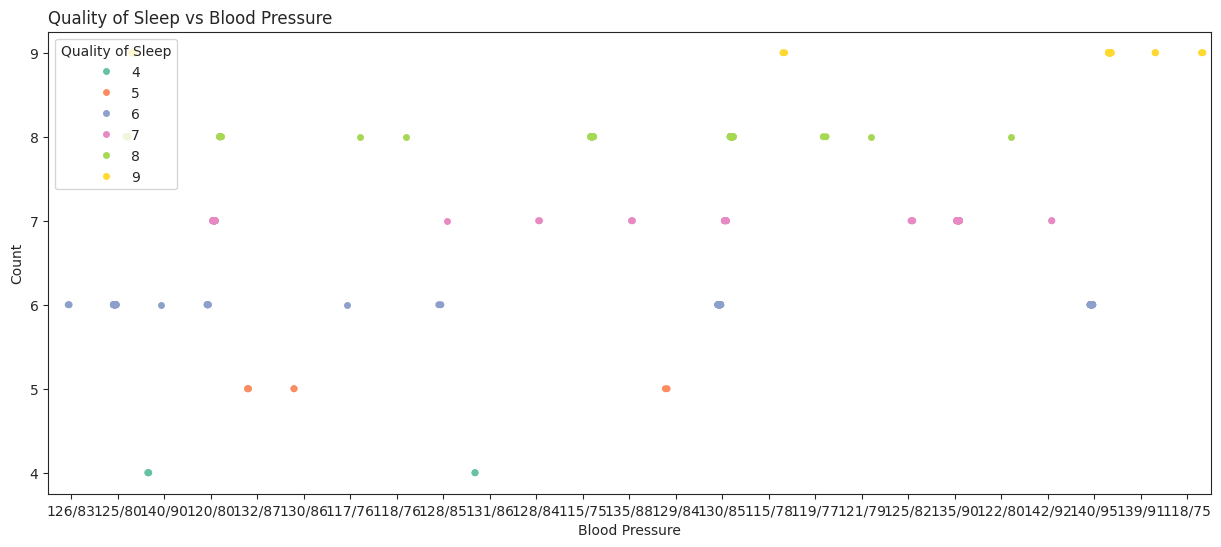

In [26]:
sleep_quality = sleepData.groupby('Blood Pressure')['Quality of Sleep'].value_counts()
sleep_quality = sleep_quality.reset_index(name="count")

plt.figure(figsize=(15, 6))
sns.stripplot(data=sleepData, x="Blood Pressure", y="Quality of Sleep", hue="Quality of Sleep", jitter=0.2, dodge=True, palette="Set2", marker='o')

# Add legend
plt.legend(title='Quality of Sleep vs Blood Pressure')

# Set labels and title
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Quality of Sleep vs Blood Pressure', loc='left')
plt.legend(title='Quality of Sleep', loc='upper left')

# Show the plot
plt.show()

### 3. Multicolinarity and Correlation

In [27]:
# converting non-numeric data (String or Boolean) into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_corr = ['Age', 'Gender', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 
            'Daily Steps', 'SBP', 'DBP', 'Sleep Disorder']

sleepData_cor = sleepData.copy()

for x in col_corr:
    sleepData_cor[x]=le.fit_transform(sleepData_cor[x])

correlation_matrix = sleepData_cor[col_corr].corr()
correlation_matrix

,Age,Gender,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SBP,DBP,Sleep Disorder
Age,1.000000,-0.582396,0.256096,0.356898,0.477546,0.155844,-0.435368,0.533818,-0.243457,-0.003409,0.574837,0.565827,0.200495
Gender,-0.582396,1.000000,-0.219113,-0.129468,-0.291366,0.002004,0.396018,-0.339945,0.200785,0.073201,-0.150911,-0.218484,-0.253415
Occupation,0.256096,-0.219113,1.000000,-0.312653,-0.278071,-0.079936,0.021123,0.694390,0.051072,-0.126290,0.538343,0.530950,-0.169800
Sleep Duration,0.356898,-0.129468,-0.312653,1.000000,0.879352,0.192503,-0.810712,-0.362087,-0.488306,0.072468,-0.179073,-0.159216,0.171440
Quality of Sleep,0.477546,-0.291366,-0.278071,0.879352,1.000000,0.199317,-0.898752,-0.303876,-0.643270,0.138857,-0.147665,-0.132712,0.179592
Physical Activity Level,0.155844,0.002004,-0.079936,0.192503,0.199317,1.000000,-0.058896,0.090322,0.128855,0.746560,0.213554,0.326295,0.398821
Stress Level,-0.435368,0.396018,0.021123,-0.810712,-0.898752,-0.058896,1.000000,0.163665,0.640600,0.052700,0.121641,0.107098,-0.036058
BMI Category,0.533818,-0.339945,0.694390,-0.362087,-0.303876,0.090322,0.163665,1.000000,0.235511,-0.066200,0.714569,0.747375,0.013629
Heart Rate,-0.243457,0.200785,0.051072,-0.488306,-0.643270,0.128855,0.640600,0.235511,1.000000,-0.203414,0.293687,0.289195,0.214685
Daily Steps,-0.003409,0.073201,-0.126290,0.072468,0.138857,0.746560,0.052700,-0.066200,-0.203414,1.000000,-0.030930,0.091245,0.232649


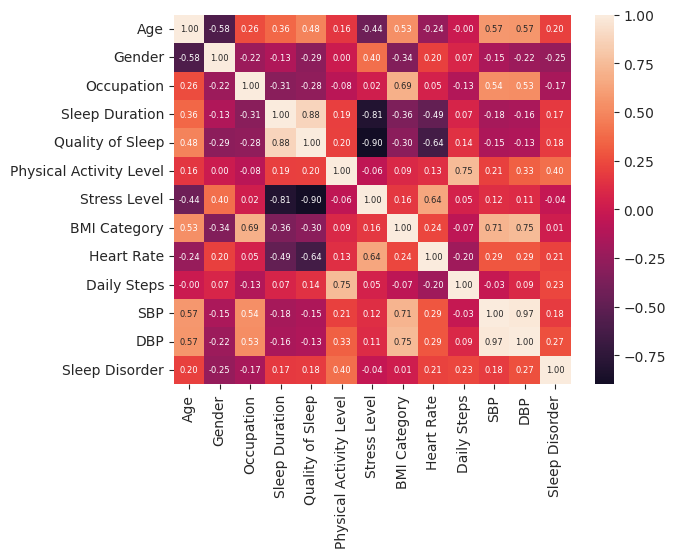

In [28]:
sns.heatmap(data = correlation_matrix,
            cmap = grad,
            annot = True, 
            fmt = ".2f",
            annot_kws = {'size': 6},
            center = 0)
plt.show()

## 3. Conclusion

# Now we can answer our questions and come to some conclusions:

* There are a relation in between gender or age with the amount of hours of sleep?;
    * Insomnia occurs equally in both males and females
    * Female is happen to be have more Sleep Apnea than Males      l
    So we can realize that we have more woman over 45years then Males in the data base, and in the other hand we have more young Males than Females, which can indicate why we have a      significant bigger number of Females with sleep apnea (It's a sleep disorder more linked with older ages) and more Males with none sleep disorder, since normally most sleep           disorders begin in adulthood.
   
* There are a relation in between profession withthe types ofSslee Disordersp?
  *  The top Insomnia professions are Salesperson, followed by Teacher, and Accountant.
  *  Nurses are having Sleep Apnea the most than other occupations
  *  Doctor, Engineer, Lawyer are having the best sleep in our list.
    
  We can relate to the finds as some professions with more energy demanding being the ones with better sleep
  and since nurses are having more Sleep apnea is most likely that they are Females over 45yo.
  The "Insomnia professions" are likely to be stressfull professions as Salesperson. 

* Can sleep quality be use as a health marker?
  * We can use the blood presure data to estimate a healthier person.
  * Normal BP is 120/80 - which conincides with None sleep disorder
  * Insomnia sleep disorder likely at 130/85 to 135/90 blood pressure
  * And lastly Sleep Apnea sleep disorder likely at 140/95 blood pressure, which in medicine would be studied and most likely medicated.

   We can analyse having or not having Sleep Disorders as health marker, but when it comes to the Quality of Sleep is almost unintuitive that the people with higher BP are the ones      having the best sleep, but we can infer that is because our body position alters our BP, getting lower.     
    
* And if so, can we predict health by Sleep Disorders?
  * As we can use diferent health makers, some we already used here as BMI, BP and others as Risk of IAM, Mental Disorders or Metabolics Disorders to relate as Sleep Disorders or the   lack of them ("None") can be impact in our quality of life. 